In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [23]:
from sklearn.datasets import load_iris
iris=load_iris()

In [24]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [25]:
#Independent Features
X=pd.DataFrame(iris['data'],columns=['sepal length', 'sepal width', 'petal length', 'petal width'])

In [26]:
#Dependent Features
y=iris['target']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10)

In [28]:
from sklearn.tree import DecisionTreeClassifier
treeClassifier=DecisionTreeClassifier()

# treeClassifier=DecisionTreeClassifier(max_depth=2)
## max_depth=2 is done for post pruning

In [29]:
treeClassifier.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.159\nsamples = 46\nvalue = [0, 4, 42]'),
 Text(0.38461538461538464, 0.5, 'x[1] <= 2.65\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0,

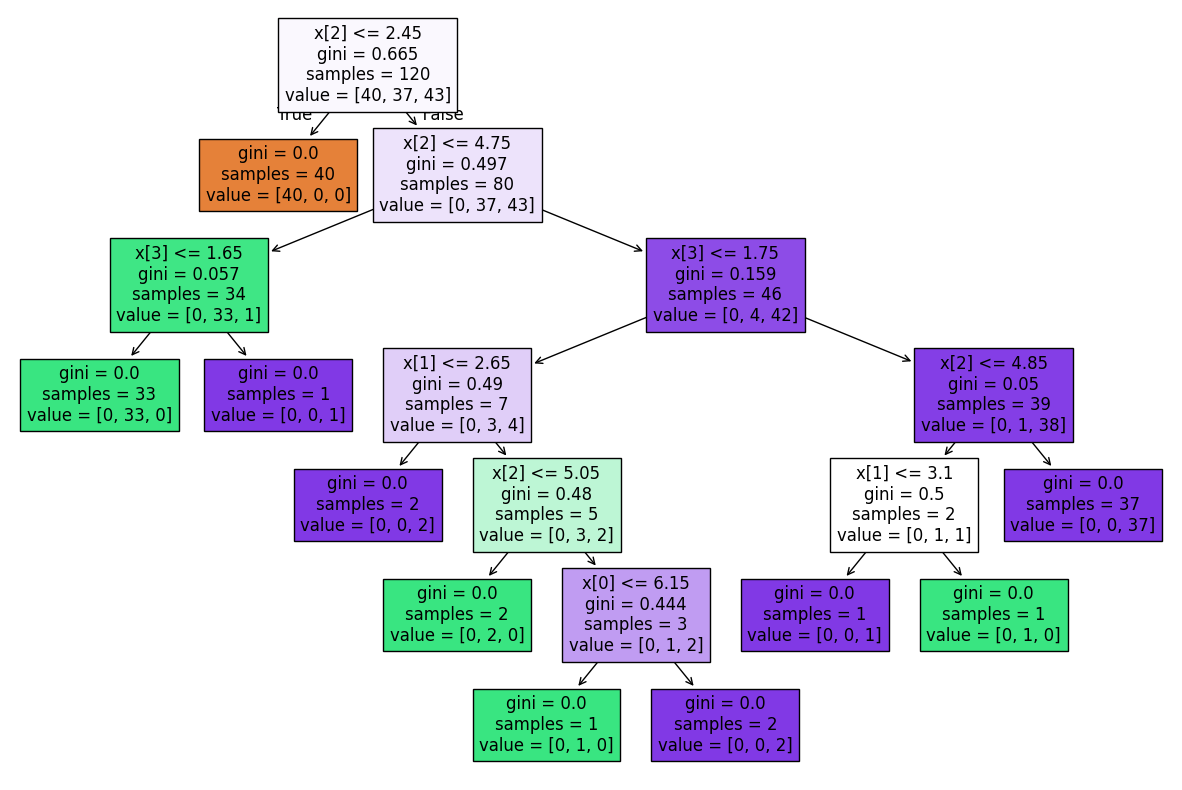

In [30]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeClassifier,filled=True)

In [31]:
y_pred=treeClassifier.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



## Prepruning & Hyperparameter Tuning

In [33]:
param={
    'criterion':['gini','entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
treemodel=DecisionTreeClassifier()

In [36]:
grid=GridSearchCV(treeClassifier, param_grid=param,cv=5,scoring='accuracy')

In [38]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [39]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [40]:
grid.best_score_

np.float64(0.95)

In [41]:
y_pred=grid.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
score=accuracy_score(y_test,y_pred)
print(score)

[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0
